In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RateTraining import *
from LIFTraining import *

In [3]:
raw_waveforms = np.transpose(np.load("raw_form.npy"))
fout = raw_waveforms[0][0:10000]

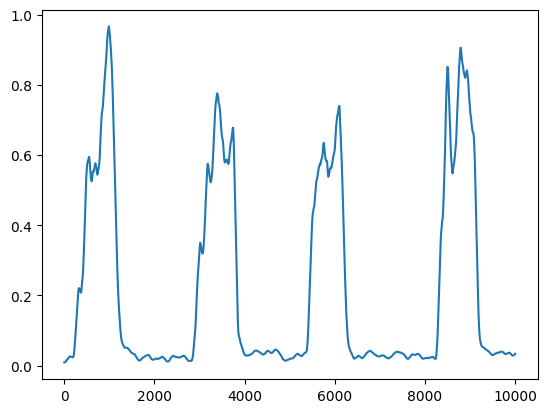

In [4]:
plt.plot(fout)

In [33]:
rpars = create_default_params_rate()
rpars['total_time'] = 10000
rpars['runtime'] = 10000
rpars['stim_off'] = 50

In [34]:
ufout = np.outer(sp.stats.uniform.rvs(size = rpars['net_size']), fout)

In [35]:
np.shape(ufout)

(300, 10000)

In [36]:
dnet = RateTraining(rpars)

In [37]:
stim = dnet.gen_rand_stim(rpars)

In [38]:
_, Hxd = dnet.run_rate(ufout)

Text(0.5, 1.0, 'Sample driven neuronal behavior')

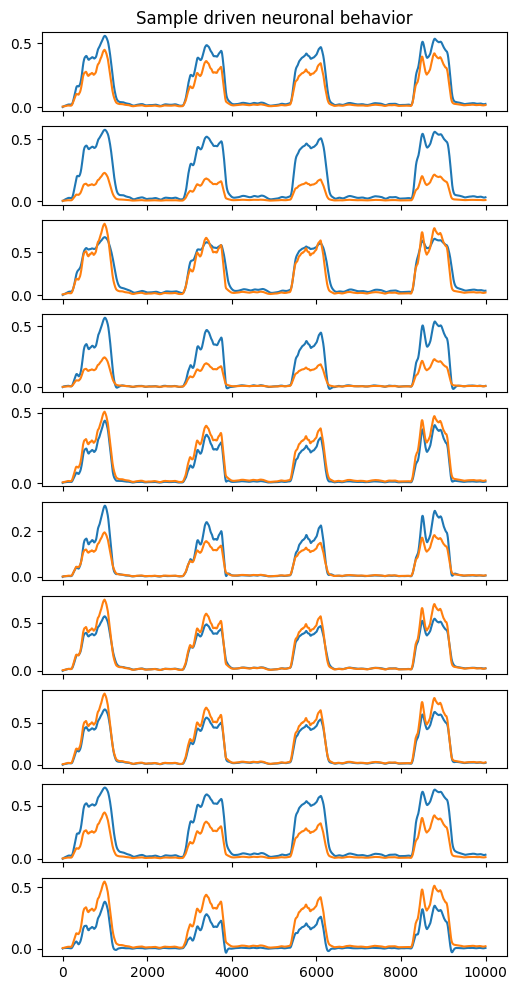

In [39]:
n_plot = 10

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    #axs[i].plot(sdrive[i])
    #axs[i].plot(stim[i])
    axs[i].plot(Hxd[i])
    axs[i].plot(ufout[i])

axs[0].set_title("Sample driven neuronal behavior")

In [43]:
aux_targs = stim + Hxd
np.shape(aux_targs)

(300, 10000)

In [54]:
lifpars = create_default_params_LIF()

In [55]:
lifpars['runtime'] = 10000
lifpars['total_time'] = 10000
lifpars['training_loops'] = 500

In [56]:
lifnet = LIFTraining(lifpars)

In [ ]:
lifnet.train_LIF(stim, aux_targs)

training: 0
training: 20
training: 40


In [ ]:
voltage, slow, fast = lifnet.run_LIF(stim)

In [ ]:
Jslow = np.dot(lifnet.Js, slow)

n_plot = 10
T = lifnet.T
dt = lifnet.dt

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(Jslow[i])
    axs[i].plot(aux_targs[i])
axs[0].set_title("Behavior after training")

In [ ]:
plt.imshow(W_trained, cmap=plt.get_cmap('seismic'), vmin = -(max(-1*np.min(W_trained), np.max(W_trained))), vmax = (max(-1*np.min(W_trained), np.max(W_trained))))
plt.title("Connectivity matrix after training")
plt.colorbar()

In [ ]:
sns.clustermap(W_trained, cmap=plt.get_cmap('seismic'), vmin = -(max(-1*np.min(W_trained), np.max(W_trained))), vmax = (max(-1*np.min(W_trained), np.max(W_trained))), figsize = (6, 6))
plt.title("Clustered connectivity matrix after training")